In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats 

In [53]:
#Import Seasonal Data
data_nas = pd.read_csv('./mef-data/data_compiled_gapfilled_seasonal.csv')
data = data_nas.dropna().reset_index(drop = True)
data.head()

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,d.76_S2S,d.137_S2E,d.137_S2S
0,Growing,1969,29.24,0.000425,422.026154,0.0,16.637363,2.340,2.740,1.07,2.44,1.37,3.05
1,Melt,1969,17.84,0.003362,422.060119,1.5,9.660714,5.440,4.930,3.81,5.94,3.81,5.18
2,Snow,1969,32.48,0.000684,421.993211,73.0,-6.568421,4.345,4.735,2.97,6.02,2.36,6.22
3,Growing,1970,13.43,0.000056,421.914022,0.0,16.641304,2.030,1.420,0.30,0.91,1.22,2.74
4,Melt,1970,15.63,0.002491,422.063188,2.3,12.637681,3.840,5.610,3.81,6.25,3.81,5.18


Text(0.5, 0.98, 'Seasonal Streamflow Drivers, no lag')

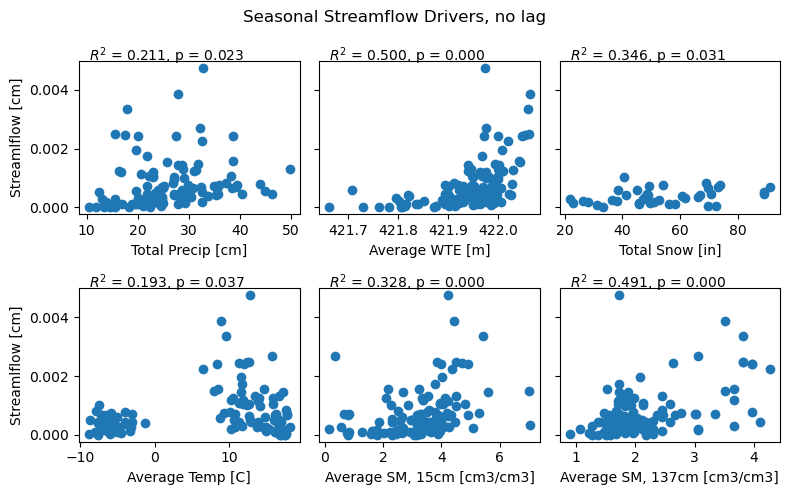

In [44]:
#Plots of seasonal variables affecting streamflow - no lags
fig, ax = plt.subplots(2, 3, figsize = (8, 5), 
                       sharey = True,
                       layout = 'tight')

def plotScatter(x, y, label, axis):
    axis.scatter(x, y)
    axis.set_xlabel(label)
    _, _, r_value, p_value, _ = scipy.stats.linregress(x, y)
    axis.annotate(r"$R^2$ = {:.3f}, p = {:.3f}".format(r_value, p_value), (min(x), 0.005))

plotScatter(data.South_PCP, data.qInterval, 'Total Precip [cm]', ax[0, 0])
plotScatter(data.WTE, data.qInterval, 'Average WTE [m]', ax[0, 1])
plotScatter(data.Snow_in[data.season == 'Snow'], data.qInterval[data.season == 'Snow'], 'Total Snow [in]', ax[0, 2])
plotScatter(data.MEANC, data.qInterval, 'Average Temp [C]', ax[1, 0])
plotScatter(data['d.15_S2E'], data.qInterval,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data['d.15_S2S'], data.qInterval,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data['d.137_S2E'], data.qInterval, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])
#plotScatter(data['d.137_S2S'], data.qInterval, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, no lag')

In [71]:
#Shift dates forward for lag 1 plots
data = data.sort_values(['year', 'season'], ascending = [True, False]).reset_index(drop = True)
data_lag1 = data[1:].reset_index(drop = True)
data_lag1['shiftedSeason'] = data.season
for col in ['South_PCP', 'WTE', 'Snow_in', 'MEANC', 'd.15_S2E', 'd.15_S2S', 'd.76_S2E', 'd.76_S2S', 'd.137_S2E', 'd.137_S2S']:
    data_lag1[col] = data[col]

data_lag1.head()

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,d.76_S2S,d.137_S2E,d.137_S2S,shiftedSeason
0,Melt,1969,32.48,0.003362,421.993211,73.0,-6.568421,4.345,4.735,2.97,6.02,2.360,6.220,Snow
1,Growing,1969,17.84,0.000425,422.060119,1.5,9.660714,5.440,4.930,3.81,5.94,3.810,5.180,Melt
2,Snow,1970,29.24,0.000659,422.026154,0.0,16.637363,2.340,2.740,1.07,2.44,1.370,3.050,Growing
3,Melt,1970,30.85,0.002491,422.005343,69.7,-7.075980,3.895,4.650,2.97,4.88,2.665,4.345,Snow
4,Growing,1970,15.63,0.000056,422.063188,2.3,12.637681,3.840,5.610,3.81,6.25,3.810,5.180,Melt


Text(0.5, 0.98, 'Seasonal Streamflow Drivers, Lag 1')

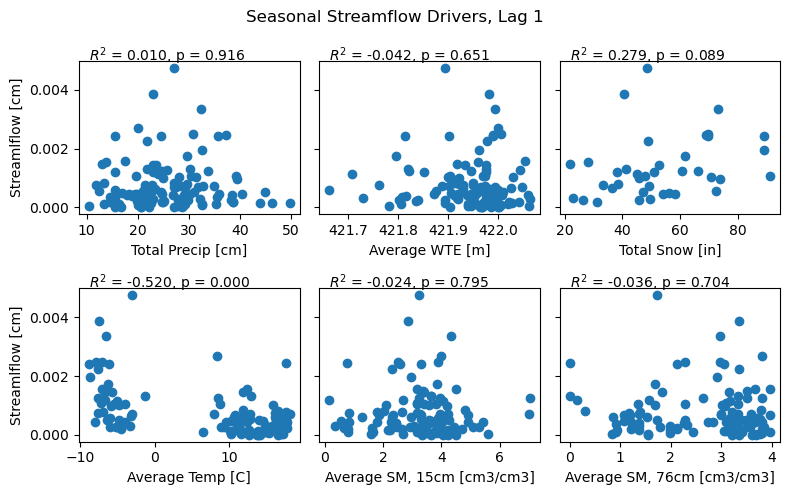

In [79]:
fig, ax = plt.subplots(2, 3, figsize = (8, 5), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_lag1.South_PCP, data_lag1.qInterval, 'Total Precip [cm]', ax[0, 0])
plotScatter(data_lag1.WTE, data_lag1.qInterval, 'Average WTE [m]', ax[0, 1])
plotScatter(data_lag1.Snow_in[data_lag1.shiftedSeason == 'Snow'], data_lag1.qInterval[data_lag1.shiftedSeason == 'Snow'], 'Total Snow [in]', ax[0, 2])
plotScatter(data_lag1.MEANC, data_lag1.qInterval, 'Average Temp [C]', ax[1, 0])
plotScatter(data_lag1['d.15_S2E'], data_lag1.qInterval,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_lag1['d.15_S2S'], data_lag1.qInterval,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_lag1['d.76_S2E'], data_lag1.qInterval, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_lag1['d.76_S2S'], data_lag1.qInterval, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Lag 1')

In [76]:
#Shift dates forward for lag 2 plots
data_lag2 = data[2:].reset_index(drop = True)
data_lag2['shiftedSeason'] = data.season
for col in ['South_PCP', 'WTE', 'Snow_in', 'MEANC', 'd.15_S2E', 'd.15_S2S', 'd.76_S2E', 'd.76_S2S', 'd.137_S2E', 'd.137_S2S']:
    data_lag2[col] = data[col]

data_lag2.head()

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,d.76_S2S,d.137_S2E,d.137_S2S,shiftedSeason
0,Growing,1969,32.48,0.000425,421.993211,73.0,-6.568421,4.345,4.735,2.97,6.02,2.360,6.220,Snow
1,Snow,1970,17.84,0.000659,422.060119,1.5,9.660714,5.440,4.930,3.81,5.94,3.810,5.180,Melt
2,Melt,1970,29.24,0.002491,422.026154,0.0,16.637363,2.340,2.740,1.07,2.44,1.370,3.050,Growing
3,Growing,1970,30.85,0.000056,422.005343,69.7,-7.075980,3.895,4.650,2.97,4.88,2.665,4.345,Snow
4,Snow,1972,15.63,0.000822,422.063188,2.3,12.637681,3.840,5.610,3.81,6.25,3.810,5.180,Melt


Text(0.5, 0.98, 'Seasonal Streamflow Drivers, Lag 2')

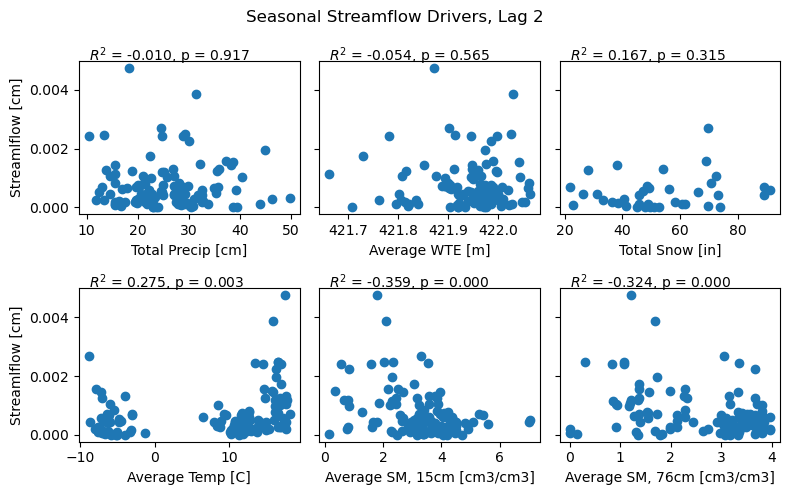

In [78]:
fig, ax = plt.subplots(2, 3, figsize = (8, 5), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_lag2.South_PCP, data_lag2.qInterval, 'Total Precip [cm]', ax[0, 0])
plotScatter(data_lag2.WTE, data_lag2.qInterval, 'Average WTE [m]', ax[0, 1])
plotScatter(data_lag2.Snow_in[data_lag2.shiftedSeason == 'Snow'], data_lag2.qInterval[data_lag2.shiftedSeason == 'Snow'], 'Total Snow [in]', ax[0, 2])
plotScatter(data_lag2.MEANC, data_lag2.qInterval, 'Average Temp [C]', ax[1, 0])
plotScatter(data_lag2['d.15_S2E'], data_lag2.qInterval,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_lag2['d.15_S2S'], data_lag2.qInterval,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_lag2['d.76_S2E'], data_lag2.qInterval, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_lag2['d.76_S2S'], data_lag2.qInterval, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Lag 2')